In [1]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

https://erdb.epa.gov.tw/DataRepository/EnvMonitor/AirQualityMonitorDayData.aspx?topic1=%u5927%u6c23&topic2=%u74b0%u5883%u53ca%u751f%u614b%u76e3%u6e2c&subject=%u7a7a%u6c23%u54c1%u8cea

In [128]:
df = pd.read_excel("空氣品質監測日值_古亭.xlsx")
df.head(5)

,序號,縣市,監測日期,測站,二氧化硫<br />SO2<br />(ppb),一氧化碳<br />CO<br />(ppm),臭氧<br />O3<br />(ppb),懸浮微粒<br />PM 10 <br />(μg/m 3 ),細懸浮微粒<br />PM 2.5 <br />(μg/m 3 ),氮氧化物<br />NOx<br />(ppb),一氧化氮<br />NO<br />(ppb),二氧化氮<br />NO2<br />(ppb),總碳氫化合物<br />THC<br />(ppm),非甲烷碳氫化合物<br />NMHC<br />(ppm),甲烷<br />CH4<br />(ppm),風速<br />WIND_SPEED<br />(m/sec),小時風速值<br />WS_HR<br />(m/sec),溫度<br />AMB_TEMP<br />(℃),相對濕度<br />RH<br />(percent)
0,1,臺北市,2019-03-31,古亭,1.3,0.28,58.0,54,25,9,1.15,7.85,1.96,0.053,1.903,3.73,3.26,19.80,72.50
1,2,臺北市,2019-03-30,古亭,1.6,0.37,43.5,32,18,16,2.98,13.36,2.04,0.095,1.941,2.23,1.92,21.74,75.55
2,3,臺北市,2019-03-29,古亭,1.7,0.45,28.3,50,27,22,3.48,18.57,2.08,0.136,1.939,1.80,1.39,24.08,78.46
3,4,臺北市,2019-03-28,古亭,2.5,0.62,28.7,42,23,27,4.99,21.55,2.14,0.175,1.965,1.67,1.34,26.14,68.35
4,5,臺北市,2019-03-27,古亭,3.2,0.74,30.5,49,29,35,6.04,29.42,2.35,0.275,2.073,1.37,1.04,23.93,70.93


In [132]:
df.replace('-',0,inplace=True)

In [133]:
data1 = np.array(df.iloc[:,4:8])
data2 = np.array(df.iloc[:,9:19])
x_data = np.concatenate((data1,data2),axis=1)
y_data = np.array(df.iloc[:,8])

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3,random_state = 200)

In [136]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
xlabel = np.array(np.datetime_as_string(df.iloc[:,2]))
for i in range(0,len(xlabel)):
    xlabel[i] = xlabel[i][0:10]

In [151]:
model.score(x_test,y_test)

0.8920499870495802

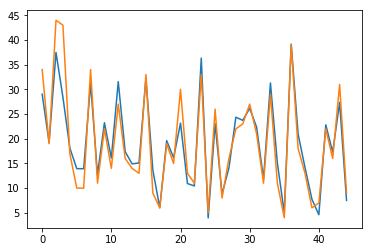

In [156]:
Y_pred = model.predict(x_test) 
plt.plot(Y_pred)
plt.plot(y_test)